In [153]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://btc.com/stats/diff"
rv = requests.get(url)
soup = BeautifulSoup(rv.text)
html_text = soup.find('div', {'class': 'diff-summary'}).text
html_text = html_text.splitlines()
html_text = [i.strip() for i in html_text if i]
print(html_text)

curr_difficulty = float(html_text[html_text.index('Difficulty')+1].split('-')[0].replace(',', ''))
next_difficulty = float(html_text[html_text.index('Next Difficulty Estimated')+1].split('-')[0].replace(',', ''))

difficulty = {"curr_difficulty":curr_difficulty,"next_difficulty":next_difficulty}


['Hashrate', '370.51 EH/s', 'Difficulty', '51,234,338,863,442 - 51.23 T', 'Next Difficulty Estimated', '51,831,793,826,858 -', '(+1.17%)', '51.83 T', 'Date to Next Difficulty', '9 Days', '17 Hours']
51234338863442.0
51831793826858.0


In [61]:
import pandas as pd
import datetime
import numpy as np

df1 = pd.read_csv("data_copy.csv",low_memory=False)
df2 = pd.read_csv("s2f_table.csv")

display(df2)

df1 = df1[
        [
            "time",
            "BlkCnt",
            "BlkHeight",
            "DiffLast",
            "Reward",
            "PriceUSD",
            "PriceBTC",
            "BTCGenFrmBlk",
            "totalBTC",
            "btc_supply_by_dates",
            "s2f_ratio_463",
            "s2f_ratio_usd_463",
            "s2f_ratio_10",
            "s2f_ratio_usd_10"
        ]
    ]

df1 = df1[df1['time'].notnull() == True].set_index('time')
df2 = df2[df2['time'].notnull() == True].set_index('time')


# df1.set_index('time',inplace=True)
# df2.set_index('time',inplace=True)
# display(df2.head())

# print(df1.index)

# idx = pd.date_range(datetime.date(2009, 1, 1), datetime.date(2032, 5, 1))
idx = pd.date_range('08-01-2010', '05-01-2032')
# print(idx)
df1.index = pd.DatetimeIndex(df1.index)
df1 = df1.reindex(idx)
df2.index = pd.DatetimeIndex(df2.index)
df2 = df2.reindex(idx)
# display(df2.head())
# df2.tail()

display(df1.head())

df1.join(df2, how='left')

time      StockBTC  RewardBTC    FlowBTC         s2f
0  2009-01-01  5.000000e+01   25.00000  1314000.0    0.000038
1  2012-11-28  1.027445e+07   25.00000  1314000.0    7.819216
2  2016-09-07  1.535162e+07   12.50000   657000.0   23.366248
3  2020-05-11  1.796641e+07    6.25000   328500.0   54.692275
4  2024-05-01  1.947661e+07    3.12500   164250.0  118.579033
5  2028-05-01  2.023950e+07    1.56250    82125.0  246.447527
6  2032-05-01  2.062035e+07    0.78125    41062.5  502.169901

BlkCnt  BlkHeight    DiffLast  Reward  PriceUSD  PriceBTC  \
2010-08-01   239.0    71680.0  244.213223    50.0  0.061100       1.0   
2010-08-02   242.0    71922.0  244.213223    50.0  0.060000       1.0   
2010-08-03   227.0    72149.0  244.213223    50.0  0.060012       1.0   
2010-08-04   243.0    72392.0  244.213223    50.0  0.057016       1.0   
2010-08-05   218.0    72610.0  352.161209    50.0  0.061000       1.0   

            BTCGenFrmBlk   totalBTC  btc_supply_by_dates  s2f_ratio_463  \
2010-08-01       11950.0  3584000.0            3584000.0       0.261314   
2010-08-02       12100.0  3596100.0            3596100.0       0.263128   
2010-08-03       11350.0  3607450.0            3607450.0       0.264796   
2010-08-04       12150.0  3619600.0            3619600.0       0.266720   
2010-08-05       10900.0  3630500.0            3630500.0       0.269029   

            s2f_ratio_usd_463  s2f_ratio_10  s2f_ratio_usd_10  
2010-08-01           0.002147      0.961442          0.158095  
2010-08-02           0.002197      0.941367          0.147461  
2010-08-03           0.002243      0.926601          0.139965  
2010-08-04           0.002297      0.924303          0.138822  
2010-08-05           0.002364      0.938759          0.146117

BlkCnt  BlkHeight    DiffLast  Reward  PriceUSD  PriceBTC  \
2010-08-01   239.0    71680.0  244.213223    50.0  0.061100       1.0   
2010-08-02   242.0    71922.0  244.213223    50.0  0.060000       1.0   
2010-08-03   227.0    72149.0  244.213223    50.0  0.060012       1.0   
2010-08-04   243.0    72392.0  244.213223    50.0  0.057016       1.0   
2010-08-05   218.0    72610.0  352.161209    50.0  0.061000       1.0   
...            ...        ...         ...     ...       ...       ...   
2032-04-27     NaN        NaN         NaN     NaN       NaN       NaN   
2032-04-28     NaN        NaN         NaN     NaN       NaN       NaN   
2032-04-29     NaN        NaN         NaN     NaN       NaN       NaN   
2032-04-30     NaN        NaN         NaN     NaN       NaN       NaN   
2032-05-01     NaN        NaN         NaN     NaN       NaN       NaN   

            BTCGenFrmBlk   totalBTC  btc_supply_by_dates  s2f_ratio_463  \
2010-08-01       11950.0  3584000.0            3584000.0       0.261314   
2010-08-02       12100.0  3596100.0            3596100.0       0.263128   
2010-08-03       11350.0  3607450.0            3607450.0       0.264796   
2010-08-04       12150.0  3619600.0            3619600.0       0.266720   
2010-08-05       10900.0  3630500.0            3630500.0       0.269029   
...                  ...        ...                  ...            ...   
2032-04-27           NaN        NaN                  NaN            NaN   
2032-04-28           NaN        NaN                  NaN            NaN   
2032-04-29           NaN        NaN                  NaN            NaN   
2032-04-30           NaN        NaN                  NaN            NaN   
2032-05-01           NaN        NaN                  NaN            NaN   

            s2f_ratio_usd_463  s2f_ratio_10  s2f_ratio_usd_10      StockBTC  \
2010-08-01           0.002147      0.961442          0.158095           NaN   
2010-08-02           0.002197      0.941367          0.147461           NaN   
2010-08-03           0.002243      0.926601          0.139965           NaN   
2010-08-04           0.002297      0.924303          0.138822           NaN   
2010-08-05           0.002364      0.938759          0.146117           NaN   
...                       ...           ...               ...           ...   
2032-04-27                NaN           NaN               NaN           NaN   
2032-04-28                NaN           NaN               NaN           NaN   
2032-04-29                NaN           NaN               NaN           NaN   
2032-04-30                NaN           NaN               NaN           NaN   
2032-05-01                NaN           NaN               NaN  2.062035e+07   

            RewardBTC  FlowBTC         s2f  
2010-08-01        NaN      NaN         NaN  
2010-08-02        NaN      NaN         NaN  
2010-08-03        NaN      NaN         NaN  
2010-08-04        NaN      NaN         NaN  
2010-08-05        NaN      NaN         NaN  
...               ...      ...         ...  
2032-04-27        NaN      NaN         NaN  
2032-04-28        NaN      NaN         NaN  
2032-04-29        NaN      NaN         NaN  
2032-04-30        NaN      NaN         NaN  
2032-05-01    0.78125  41062.5  502.169901  

[7945 rows x 17 columns]

In [37]:
pd.concat([df1, df2], axis=1)

BlkHeight  Reward  BTCGenFrmBlk  totalBTC  btc_supply_by_dates  \
time                                                                         
2009-01-03        0.0    50.0           0.0       0.0         0.000000e+00   
2009-01-04        0.0    50.0           0.0       0.0         0.000000e+00   
2009-01-05        0.0    50.0           0.0       0.0         0.000000e+00   
2009-01-06        0.0    50.0           0.0       0.0         0.000000e+00   
2009-01-07        0.0    50.0           0.0       0.0         0.000000e+00   
...               ...     ...           ...       ...                  ...   
2023-06-03        NaN     NaN           NaN       NaN         1.939196e+07   
2009-01-01        NaN     NaN           NaN       NaN                  NaN   
2024-05-01        NaN     NaN           NaN       NaN                  NaN   
2028-05-01        NaN     NaN           NaN       NaN                  NaN   
2032-05-01        NaN     NaN           NaN       NaN                  NaN   

            s2f_ratio_463  s2f_ratio_usd_463  s2f_ratio_10  s2f_ratio_usd_10  \
time                                                                           
2009-01-03            NaN                NaN           NaN               NaN   
2009-01-04            NaN                NaN           NaN               NaN   
2009-01-05            NaN                NaN           NaN               NaN   
2009-01-06            NaN                NaN           NaN               NaN   
2009-01-07            NaN                NaN           NaN               NaN   
...                   ...                ...           ...               ...   
2023-06-03      56.779361      110688.155287      56.94704     111770.534098   
2009-01-01            NaN                NaN           NaN               NaN   
2024-05-01            NaN                NaN           NaN               NaN   
2028-05-01            NaN                NaN           NaN               NaN   
2032-05-01            NaN                NaN           NaN               NaN   

                StockBTC  RewardBTC    FlowBTC         s2f  
time                                                        
2009-01-03           NaN        NaN        NaN         NaN  
2009-01-04           NaN        NaN        NaN         NaN  
2009-01-05           NaN        NaN        NaN         NaN  
2009-01-06           NaN        NaN        NaN         NaN  
2009-01-07           NaN        NaN        NaN         NaN  
...                  ...        ...        ...         ...  
2023-06-03           NaN        NaN        NaN         NaN  
2009-01-01  5.000000e+01   25.00000  1314000.0    0.000038  
2024-05-01  1.947661e+07    3.12500   164250.0  118.579033  
2028-05-01  2.023950e+07    1.56250    82125.0  246.447527  
2032-05-01  2.062035e+07    0.78125    41062.5  502.169901  

[5269 rows x 13 columns]

In [34]:
# pd.concat([df1,df2], verify_integrity=True)
result = pd.concat([df1, df2], axis=1)
#result = result.reset_index()
#result = result.ffill()
#result.describe()
idx = pd.date_range('01-01-2009', '05-01-2032')
#idx = pd.date_range('08-01-2010', '05-01-2032')

# #result.index = pd.DatetimeIndex(result.index)

result = result.reindex(idx,fill_value=None)
result.s2f = result.s2f.ffill()

In [36]:
result.dropna()

Empty DataFrame
Columns: [BlkHeight, Reward, BTCGenFrmBlk, totalBTC, btc_supply_by_dates, s2f_ratio_463, s2f_ratio_usd_463, s2f_ratio_10, s2f_ratio_usd_10, StockBTC, RewardBTC, FlowBTC, s2f]
Index: []

In [6]:
from utils import Coinmetrics_API
from lib import *
import time

def add_btc_info(df):
    df['time'] = pd.to_datetime(df['time']).dt.strftime('%Y-%m-%d')
    df["BlkHeight"] = df.BlkCnt.cumsum()
    df["Reward"] = 50 / (2 ** np.floor(df["BlkHeight"] / 210000))
    df["BTCGenFrmBlk"] = df.BlkCnt * df["Reward"]
    df["totalBTC"] = df.BTCGenFrmBlk.cumsum()
    return df

df = pd.read_csv("btc.csv",low_memory=False)
df = add_btc_info(df)

btc_supply_by_dates = []
my_API_fetcher = Coinmetrics_API()
for i in tqdm(range(len(df))):
    btc_supply_by_dates.append(my_API_fetcher.btcSupplyOnDate(df.iloc[i].time))
    



2023-06-03 01:59:44 INFO     API key not found. Using community client
  0%|          | 3/5263 [00:02<1:00:40,  1.44it/s]


KeyboardInterrupt: 

In [32]:
df['btc_supply_by_dates'] = btc_supply_by_dates

In [40]:
df.drop(df.tail(1).index,inplace=True)


In [46]:
df = df.dropna(axis=1)


time  AdrActCnt  AdrBal1in100KCnt  AdrBal1in100MCnt  \
0     2009-01-03        0.0               0.0               0.0   
1     2009-01-04        0.0               0.0               0.0   
2     2009-01-05        0.0               0.0               0.0   
3     2009-01-06        0.0               0.0               0.0   
4     2009-01-07        0.0               0.0               0.0   
...          ...        ...               ...               ...   
5257  2023-05-27   877266.0            9028.0         2966263.0   
5258  2023-05-28   863880.0            9032.0         2966096.0   
5259  2023-05-29   912071.0            9027.0         2965247.0   
5260  2023-05-30   959148.0            9015.0         2966126.0   
5261  2023-05-31   925966.0            9018.0         2967017.0   

      AdrBal1in10BCnt  AdrBal1in10KCnt  AdrBal1in10MCnt  AdrBal1in1BCnt  \
0                 0.0              0.0              0.0             0.0   
1                 0.0              0.0              0.0             0.0   
2                 0.0              0.0              0.0             0.0   
3                 0.0              0.0              0.0             0.0   
4                 0.0              0.0              0.0             0.0   
...               ...              ...              ...             ...   
5257       19745103.0            946.0         549602.0       9147386.0   
5258       19739607.0            948.0         549610.0       9146787.0   
5259       19738983.0            954.0         549359.0       9148065.0   
5260       19740632.0            953.0         549343.0       9153012.0   
5261       19765636.0            956.0         549481.0       9152494.0   

      AdrBal1in1KCnt  AdrBal1in1MCnt  ...  SplyMiner1HopAllNtv     TxCnt  \
0                0.0             0.0  ...         5.000000e+01       0.0   
1                0.0             0.0  ...         5.000000e+01       0.0   
2                0.0             0.0  ...         5.000000e+01       0.0   
3                0.0             0.0  ...         5.000000e+01       0.0   
4                0.0             0.0  ...         5.000000e+01       0.0   
...              ...             ...  ...                  ...       ...   
5257            43.0        101358.0  ...         2.560816e+06  469559.0   
5258            43.0        101320.0  ...         2.562082e+06  499561.0   
5259            43.0        101340.0  ...         2.561811e+06  548854.0   
5260            43.0        101333.0  ...         2.565914e+06  511408.0   
5261            43.0        101323.0  ...         2.568765e+06  421021.0   

      TxCntSec   TxTfrCnt  TxTfrValAdjNtv  BlkHeight  Reward  BTCGenFrmBlk  \
0     0.000000        0.0        0.000000        0.0   50.00          0.00   
1     0.000000        0.0        0.000000        0.0   50.00          0.00   
2     0.000000        0.0        0.000000        0.0   50.00          0.00   
3     0.000000        0.0        0.000000        0.0   50.00          0.00   
4     0.000000        0.0        0.000000        0.0   50.00          0.00   
...        ...        ...             ...        ...     ...           ...   
5257  5.434711   989296.0    71493.150871   791704.0    6.25        906.25   
5258  5.781956   992045.0    71683.253266   791864.0    6.25       1000.00   
5259  6.352477  1054640.0   109582.688549   792026.0    6.25       1012.50   
5260  5.919074  1053914.0   129495.251916   792180.0    6.25        962.50   
5261  4.872928   967292.0   153174.052571   792321.0    6.25        881.25   

         totalBTC  btc_supply_by_dates  
0            0.00         0.000000e+00  
1            0.00         0.000000e+00  
2            0.00         0.000000e+00  
3            0.00         0.000000e+00  
4            0.00         0.000000e+00  
...           ...                  ...  
5257  19380906.25         1.938544e+07  
5258  19381906.25         1.938644e+07  
5259  19382918.75         1.938745e+07  
5260  19383881.25         1.938841e+07  
5261 

In [5]:
for i in df.columns:
    print(i)

time
AdrActCnt
AdrBal1in100KCnt
AdrBal1in100MCnt
AdrBal1in10BCnt
AdrBal1in10KCnt
AdrBal1in10MCnt
AdrBal1in1BCnt
AdrBal1in1KCnt
AdrBal1in1MCnt
AdrBalCnt
AdrBalNtv0.001Cnt
AdrBalNtv0.01Cnt
AdrBalNtv0.1Cnt
AdrBalNtv100Cnt
AdrBalNtv100KCnt
AdrBalNtv10Cnt
AdrBalNtv10KCnt
AdrBalNtv1Cnt
AdrBalNtv1KCnt
AdrBalNtv1MCnt
AdrBalUSD100Cnt
AdrBalUSD100KCnt
AdrBalUSD10Cnt
AdrBalUSD10KCnt
AdrBalUSD10MCnt
AdrBalUSD1Cnt
AdrBalUSD1KCnt
AdrBalUSD1MCnt
AssetEODCompletionTime
BlkCnt
BlkSizeMeanByte
BlkWghtMean
BlkWghtTot
CapAct1yrUSD
CapMVRVCur
CapMVRVFF
CapMrktCurUSD
CapMrktEstUSD
CapMrktFFUSD
CapRealUSD
DiffLast
DiffMean
FeeByteMeanNtv
FeeMeanNtv
FeeMeanUSD
FeeMedNtv
FeeMedUSD
FeeTotNtv
FeeTotUSD
FlowInExNtv
FlowInExUSD
FlowOutExNtv
FlowOutExUSD
FlowTfrFromExCnt
HashRate
HashRate30d
IssContNtv
IssContPctAnn
IssContPctDay
IssContUSD
IssTotNtv
IssTotUSD
NDF
NVTAdj
NVTAdj90
NVTAdjFF
NVTAdjFF90
PriceBTC
PriceUSD
ROI1yr
ROI30d
ReferenceRate
ReferenceRateETH
ReferenceRateEUR
ReferenceRateUSD
RevAllTimeUSD
RevHas

In [47]:
df.to_csv("btc_updated.csv")

In [15]:
data = my_API_fetcher.getData()

data["flow10_1"] = data["totalBTC"].diff(10)
data["flow10_2"] = data["btcSupplyOnDate"].diff(10)

data["flow463_1"] = data["totalBTC"].diff(463)
data["flow463_2"] = data["btcSupplyOnDate"].diff(463)

data["supplyPeriodAgo10_2"] = data["btcSupplyOnDate"].shift(10)
data["supplyPeriodAgo463_2"] = data["btcSupplyOnDate"].shift(463)

data["stock_to_flow_ratio_10_2"] = (data["supplyPeriodAgo10_2"]) / ((data["flow10_2"]) / 10 * 365)
data["stock_to_flow_ratio_463_2"] = (data["supplyPeriodAgo463_2"]) / ((data["flow463_2"]) / 463 * 365)

data["stock_to_flow_usd_10"] = 0.18 * data["stock_to_flow_ratio_10_2"] ** 3.3
data["stock_to_flow_usd_463"] = 0.18 * data["stock_to_flow_ratio_463_2"] ** 3.3

#data["stock_to_flow_usd_10"] = 0.1588 * data["stock_to_flow_ratio_10_2"] ** 3.36
#data["stock_to_flow_usd_463"] = 0.1588 * data["stock_to_flow_ratio_463_2"] ** 3.36

display(data.head())
display(data.describe())
display(data.info())

time  BlkCnt  PriceBTC  PriceUSD  \
1970-01-01 00:00:00.000000000 2009-01-03     0.0       1.0       NaN   
1970-01-01 00:00:00.000000001 2009-01-04     0.0       1.0       NaN   
1970-01-01 00:00:00.000000002 2009-01-05     0.0       1.0       NaN   
1970-01-01 00:00:00.000000003 2009-01-06     0.0       1.0       NaN   
1970-01-01 00:00:00.000000004 2009-01-07     0.0       1.0       NaN   

                               HashRate  DiffLast  BlkHeight  Reward  \
1970-01-01 00:00:00.000000000       NaN       NaN        0.0    50.0   
1970-01-01 00:00:00.000000001       NaN       NaN        0.0    50.0   
1970-01-01 00:00:00.000000002       NaN       NaN        0.0    50.0   
1970-01-01 00:00:00.000000003       NaN       NaN        0.0    50.0   
1970-01-01 00:00:00.000000004       NaN       NaN        0.0    50.0   

                               BTCGenFrmBlk  totalBTC  ...  flow10_1  \
1970-01-01 00:00:00.000000000           0.0       0.0  ...       NaN   
1970-01-01 00:00:00.000000001           0.0       0.0  ...       NaN   
1970-01-01 00:00:00.000000002           0.0       0.0  ...       NaN   
1970-01-01 00:00:00.000000003           0.0       0.0  ...       NaN   
1970-01-01 00:00:00.000000004           0.0       0.0  ...       NaN   

                               flow10_2  supplyPeriodAgo10_2  \
1970-01-01 00:00:00.000000000       NaN                  NaN   
1970-01-01 00:00:00.000000001       NaN                  NaN   
1970-01-01 00:00:00.000000002       NaN                  NaN   
1970-01-01 00:00:00.000000003       NaN                  NaN   
1970-01-01 00:00:00.000000004       NaN                  NaN   

                               stock_to_flow_ratio_10_2  stock_to_flow_usd_10  \
1970-01-01 00:00:00.000000000                       NaN                   NaN   
1970-01-01 00:00:00.000000001                       NaN                   NaN   
1970-01-01 00:00:00.000000002                       NaN                   NaN   
1970-01-01 00:00:00.000000003                       NaN                   NaN   
1970-01-01 00:00:00.000000004                       NaN                   NaN   

                               flow463_1  flow463_2  supplyPeriodAgo463_2  \
1970-01-01 00:00:00.000000000        NaN        NaN                   NaN   
1970-01-01 00:00:00.000000001        NaN        NaN                   NaN   
1970-01-01 00:00:00.000000002        NaN        NaN                   NaN   
1970-01-01 00:00:00.000000003        NaN        NaN                   NaN   
1970-01-01 00:00:00.000000004        NaN        NaN                   NaN   

                               stock_to_flow_ratio_463_2  \
1970-01-01 00:00:00.000000000                        NaN   
1970-01-01 00:00:00.000000001                        NaN   
1970-01-01 00:00:00.000000002                        NaN   
1970-01-01 00:00:00.000000003                        NaN   
1970-01-01 00:00:00.000000004                        NaN   

                               stock_to_flow_usd_463  
1970-01-01 00:00:00.000000000                    NaN  
1970-01-01 00:00:00.000000001                    NaN  
1970-01-01 00:00:00.000000002                    NaN  
1970-01-01 00:00:00.000000003                    NaN  
1970-01-01 00:00:00.000000004                    NaN  

[5 rows x 21 columns]

BlkCnt  PriceBTC      PriceUSD      HashRate      DiffLast  \
count  5262.000000    5262.0   4701.000000  5.256000e+03  5.256000e+03   
mean    150.574116       1.0   9129.174546  5.059843e+07  6.974895e+12   
std      32.880957       0.0  14572.467097  8.266215e+07  1.132691e+13   
min       0.000000       1.0      0.050541  1.988411e-07  1.000000e+00   
25%     138.000000       1.0    139.129648  1.694073e+01  2.190866e+06   
50%     150.000000       1.0    902.263870  1.201126e+06  1.654968e+11   
75%     164.000000       1.0  10235.497323  8.917780e+07  1.287684e+13   
max     692.000000       1.0  67541.755508  4.407142e+08  5.123434e+13   

          BlkHeight       Reward  BTCGenFrmBlk      totalBTC  btcSupplyOnDate  \
count    5262.00000  5262.000000   5262.000000  5.262000e+03     5.261000e+03   
mean   397047.36184    24.463132   3683.915336  1.318624e+07     1.319504e+07   
std    233657.10363    16.888301   2885.724909  5.750848e+06     5.747923e+06   
min         0.00000     6.250000      0.000000  0.000000e+00     0.000000e+00   
25%    193335.00000    12.500000   1650.000000  9.666750e+06     9.680890e+06   
50%    403212.00000    25.000000   3175.000000  1.532758e+07     1.533526e+07   
75%    600886.75000    50.000000   4800.000000  1.800715e+07     1.801305e+07   
max    792321.00000    50.000000  34600.000000  1.938476e+07     1.939012e+07   

            flow10_1       flow10_2  supplyPeriodAgo10_2  \
count    5252.000000    5251.000000         5.251000e+03   
mean    36896.047934   36904.824236         1.318325e+07   
std     27804.071327   27808.868481         5.747035e+06   
min      5718.750000    5718.750000         0.000000e+00   
25%     17721.875000   17718.748747         9.660640e+06   
50%     33700.000000   33750.000000         1.531711e+07   
75%     46631.250000   46674.999950         1.799887e+07   
max    198950.000000  198950.000000         1.938079e+07   

       stock_to_flow_ratio_10_2  stock_to_flow_usd_10     flow463_1  \
count               5251.000000           5251.000000  4.799000e+03   
mean                  21.582351          26703.228097  1.742220e+06   
std                   20.539865          50289.155862  1.200870e+06   
min                    0.000000              0.000000  4.141938e+05   
25%                    3.509893             11.343381  8.507750e+05   
50%                   11.238618            527.989266  1.523562e+06   
75%                   27.107886           9649.129990  2.609138e+06   
max                   89.782170         502111.098211  4.364600e+06   

          flow463_2  supplyPeriodAgo463_2  stock_to_flow_ratio_463_2  \
count  4.798000e+03          4.798000e+03                4798.000000   
mean   1.742058e+06          1.261771e+07                  19.638681   
std    1.201117e+06          5.695426e+06                  18.518826   
min    4.141952e+05          0.000000e+00                   0.000000   
25%    8.507750e+05          8.812553e+06                   4.218984   
50%    1.521840e+06          1.444805e+07                  12.042832   
75%    2.610656e+06          1.737272e+07                  25.864172   
max    4.364500e+06          1.896653e+07                  56.948418   

       stock_to_flow_usd_463  
count            4798.000000  
mean            19454.946634  
std             37166.229837  
min                 0.000000  
25%                20.819009  
50%               663.251103  
75%              8263.762265  
max            111779.455193

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10524 entries, 1970-01-01 00:00:00 to 2023-06-01 00:00:00
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   time                       5263 non-null   datetime64[ns]
 1   BlkCnt                     5262 non-null   float64       
 2   PriceBTC                   5262 non-null   float64       
 3   PriceUSD                   4701 non-null   float64       
 4   HashRate                   5256 non-null   float64       
 5   DiffLast                   5256 non-null   float64       
 6   BlkHeight                  5262 non-null   float64       
 7   Reward                     5262 non-null   float64       
 8   BTCGenFrmBlk               5262 non-null   float64       
 9   totalBTC                   5262 non-null   float64       
 10  btcSupplyOnDate            5261 non-null   float64       
 11  flow10_1                   5252 

None

# Charts

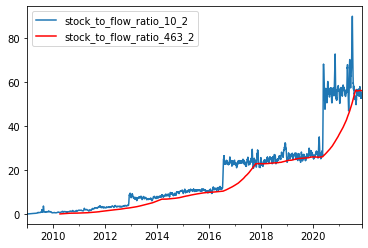

In [ ]:
ax = plt.gca()
data.plot(kind='line',y='stock_to_flow_ratio_10_2',ax=ax)
data.plot(kind='line',y='stock_to_flow_ratio_463_2', color='red',ax=ax)
plt.show()

# Generate SF Table for future

In [ ]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

def btcSupplyAtBlock(b):
    if b >= 33 * 210000:
        return 20999999.9769
    else:
        reward = 50e8
        supply = 0
        y = 210000
        while b > y - 1:
            supply = supply + y * reward
            reward = int(reward / 2.0)
            b = b - y
        supply = supply + b * reward
        #print(supply,reward)
        return (supply + reward) / 1e8
    
def btcRewardAtBlock(b):
    if b >= 33 * 210000:
        return 20999999.9769
    else:
        reward = 25e8
        supply = 0
        y = 210000
        while b > y - 1:
            supply = supply + y * reward
            reward = int(reward / 2.0)
            b = b - y
        supply = supply + b * reward
        
        return reward / 1e8
    
genesis = '2009-01-01'
halving_dates = ['2009-01-01','2012-11-28','2016-09-07','2020-05-11','2024-05-01','2028-05-01','2032-05-01']

sftable = pd.DataFrame(columns = ["date","StockBTC","RewardBTC","FlowBTC"])
sflist=[]
#sftable.columns = ["Date","StockBTC","RewardBTC","FlowBTC"]
for date in halving_dates:
    block = days_between(genesis, date) * 24 * 6
    d1 = datetime.strptime(date, '%Y-%m-%d')
    l = [d1,btcSupplyAtBlock(block),btcRewardAtBlock(block),365*24*60*0.1*btcRewardAtBlock(block)]
    sflist.append(l)
    #print(date + " - " + str(btcSupplyAtBlock(block))+ " - " + str(btcRewardAtBlock(block)))
sftable = pd.DataFrame(sflist,columns = ["date","StockBTC","RewardBTC","FlowBTC"])
#sftable['date'] = pd.to_datetime(sftable['date'], format='%y-%m-%d')

sftable.set_index("date",inplace=True)
sftable["s2f"] = sftable.StockBTC/sftable.FlowBTC
sftable

StockBTC  RewardBTC    FlowBTC         s2f
date                                                      
2009-01-01  5.000000e+01   25.00000  1314000.0    0.000038
2012-11-28  1.027445e+07   25.00000  1314000.0    7.819216
2016-09-07  1.535162e+07   12.50000   657000.0   23.366248
2020-05-11  1.796641e+07    6.25000   328500.0   54.692275
2024-05-01  1.947661e+07    3.12500   164250.0  118.579033
2028-05-01  2.023950e+07    1.56250    82125.0  246.447527
2032-05-01  2.062035e+07    0.78125    41062.5  502.169901

# Future BTC Price using S2F Plan B

In [3]:
idx = pd.date_range('01-01-2009', '05-01-2032')
#idx = pd.date_range('08-01-2010', '05-01-2032')
result = data.copy(deep=True)
result.index = pd.DatetimeIndex(result.index)

result = result.reindex(idx,fill_value=None)
result.loc['2024-05-02']['Reward'] = 3.125
result.loc['2028-05-02']['Reward'] = 1.5625
result.Reward = result.Reward.ffill()
result.BlkCnt = result.BlkCnt.bfill()   
result.BlkCnt = result.BlkCnt.fillna(144)   
result.BTCGenFrmBlk = result.BlkCnt * result.Reward

result['btcSupplyOnDate'] = result['btcSupplyOnDate'].bfill()

#print(result.loc[result['btcSupplyOnDate'].isnull()])

print(result['btcSupplyOnDate'].index.get_loc(result['btcSupplyOnDate'].last_valid_index()))
lastvalidindex = result['btcSupplyOnDate'].index.get_loc(result['btcSupplyOnDate'].last_valid_index())
#print(result.iloc[4697])
for i in range (lastvalidindex+1,len(result)):
    result.iloc[i]['btcSupplyOnDate'] = float(0)
    result.iloc[i]['btcSupplyOnDate'] = result.iloc[i-1]['btcSupplyOnDate'] + result.iloc[i]["BTCGenFrmBlk"]
# while result['btcSupplyOnDate'].isnull().any():

    #print(result['btcSupplyOnDate'].shift())
    #result.loc[result['btcSupplyOnDate'].isnull(),'btcSupplyOnDate'] = result['btcSupplyOnDate'].shift() + result.BTCGenFrmBlk
    
# print(c)
#print(result.dtypes)
#result[result.loc['2024-05-01'],'stock_to_flow_ratio_10_2'] = 118.579033
# result.loc['2024-05-01']['stock_to_flow_ratio_10_2'] = 56.6
# result.loc['2024-05-02']['stock_to_flow_ratio_10_2'] = 118.579033
# result.loc['2028-05-01']['stock_to_flow_ratio_10_2'] = 246.447527
# result.loc['2028-05-02']['stock_to_flow_ratio_10_2'] = 246.447527
#result.loc['2032-05-02']['stock_to_flow_ratio_10_2'] = 502.169901
# result["stock_to_flow_ratio_10_2"] = result["stock_to_flow_ratio_10_2"].interpolate(method='index')
ax = plt.gca()
#result.plot(kind='line',y='stock_to_flow_ratio_10_2',ax=ax)
#result.plot(kind='line',y='Reward', color='red',ax=ax)
#result.plot(kind='line',y='btcSupplyOnDate', color='green',ax=ax)

result.Reward.plot(label="Reward", legend=True)
result.btcSupplyOnDate.plot(secondary_y=True, label="btcSupplyOnDate", legend=True)
plt.show()


result["flow10_2"] = result["btcSupplyOnDate"].diff(10)
result["flow463_2"] = result["btcSupplyOnDate"].diff(463)

result["supplyPeriodAgo10_2"] = result["btcSupplyOnDate"].shift(10)
result["supplyPeriodAgo463_2"] = result["btcSupplyOnDate"].shift(463)

result["stock_to_flow_ratio_10_2"] = (result["supplyPeriodAgo10_2"]) / ((result["flow10_2"]) / 10 * 365)
result["stock_to_flow_ratio_463_2"] = (result["supplyPeriodAgo463_2"]) / ((result["flow463_2"]) / 463 * 365)

result["stock_to_flow_usd_10"] = 0.18 * result["stock_to_flow_ratio_10_2"] ** 3.3
result["stock_to_flow_usd_463"] = 0.18 * result["stock_to_flow_ratio_463_2"] ** 3.3


ax = plt.gca()
result.plot(kind='line',y='stock_to_flow_ratio_10_2',ax=ax)
result.plot(kind='line',y='stock_to_flow_ratio_463_2', color='red',ax=ax)
plt.show()


ax = plt.gca()
result.plot(kind='line',y='PriceUSD',ax=ax)
result.plot(kind='line',y='stock_to_flow_usd_463', color='red',ax=ax)
plt.show()



NameError: name 'data' is not defined

In [14]:
fig = result.iplot(kind='line',y=['PriceUSD','stock_to_flow_usd_463'],asFigure=True)
iplot(fig)

# Mining Equations

efficiency = watt / terahash; efficiency = 3360 W / 68 TH = 49.

To find the price paid per month to run a S-19 95 TH/s, at 3.25 kW, we need to first compute the monthly kWh as follows:
3.25 kW * hours per day * days per month = 3.25 * 24 * 30 = 2340 kWh/month

the estimated monthly electricity bill is:
2340 kWh * $0.06/kWh = $140.40 in electricity costs for the month.

3.25 * 0.05 = 0.1625 kW margins
lower kW bracket = 3.25 - 0.1625 = 3.0875 kW
upper kW bracket = 3.25 + 0.1625 = 3.4125 kW 

Line loss 5%:
$140.40 * 0.05 = $7.02
$140.40 +$7.02 = $147.42 due for the month, readjusted for line loss

Down time:
2340 kWh/month - 10 hours down time = 2330 kWh consumed
2330 kWh * $0.06/kWh = $139.80 due for the month, readjusted for down time

daily bitcoin miner earnings = (6.25 block reward * Hash/second * 86,400 seconds per day) / (difficulty * 2^32)

https://bitcoin.stackexchange.com/questions/77922/how-to-calculate-coins-mined-per-day

In [140]:
minerslist = [ ['s19', 95, 9000,3.250  ],
            ['s19j pro', 100,10707, 3.050  ],
            ['s19 pro', 110, 11500,3.250  ]]
hoursPerDay = 24
uptime_factor = 1
uptimeHours = uptime_factor*hoursPerDay
uptimeSec = uptimeHours*3600
#max 30 cents, min 7 cents
electricitycostmax = 0.3
electricitycostmin = 0.07
electricitycosttaken = 0.1
miners = pd.DataFrame(minerslist,columns = ["name","hashrate","cost","consumption"])
miners["consumptionMax"] = miners.consumption * (1.05)
miners["consumptionMin"] = miners.consumption * (0.95)
miners["electricityCostTaken"] = miners.consumption*uptimeHours*electricitycosttaken
miners["electricityCostMax"] = miners.consumptionMax*uptimeHours*electricitycosttaken
miners["electricityCostMin"] = miners.consumptionMin*uptimeHours*electricitycosttaken

miners

name  hashrate   cost  consumption  consumptionMax  consumptionMin  \
0       s19        95   9000         3.25          3.4125          3.0875   
1  s19j pro       100  10707         3.05          3.2025          2.8975   
2   s19 pro       110  11500         3.25          3.4125          3.0875   

   electricityCostTaken  electricityCostMax  electricityCostMin  
0                  7.80               8.190               7.410  
1                  7.32               7.686               6.954  
2                  7.80               8.190               7.410

In [197]:
difficulty_increase_per2weeks_min = 1/100
difficulty_increase_per2weeks_max = 5/100
mining = result.copy()
#mining = mining.reset_index()
frmDate = "2021-11-27"
mask = mining.index == frmDate
mining.DiffLast = mining.DiffLast.ffill()
mining["DiffLastMin"] = np.nan
mining["DiffLastMax"] = np.nan
mining["DiffLastAvg"] = np.nan

rowfrmDate = np.where(mask)[0][0]
nextDiff = 22674148233453.11
nextDiffmin =nextDiff
nextDiffmax =nextDiff
nextDiffavg =nextDiff
#print(mining.iloc[rowfrmDate])
for i in range(rowfrmDate,len(mining),14):
    mining["DiffLastAvg"].iloc[i] = nextDiff
    nextDiffmin =nextDiff*(1+difficulty_increase_per2weeks_min)
    nextDiffmax =nextDiff*(1+difficulty_increase_per2weeks_max)
    nextDiffavg =(nextDiffmin+nextDiffmax)/2
    nextDiff = nextDiffavg
    mining["DiffLastMin"].iloc[i] = nextDiffmin
    mining["DiffLastMax"].iloc[i] = nextDiffmax
    mining["DiffLastAvg"].iloc[i] = nextDiffavg
mining.DiffLastAvg = mining.DiffLastAvg.ffill()
mining.DiffLastMin = mining.DiffLastMin.ffill()
mining.DiffLastMax = mining.DiffLastMax.ffill()


name = "s19 pro"
tera = 1000000000000
numberOfMiners = 4
mining2 = mining.copy()
mining2 = mining2[mining2.index >= frmDate]
#1.5625*110*tera*uptimeSec/(*(2**32))
#mining2["dailyBTCminedAvg"] = (6.25*numberOfMiners*110*tera*86400)/(mining2.DiffLastMin*(2**32))

mining2["dailyBTCminedAvg"] = (mining2.Reward*numberOfMiners*miners[miners.name==name].hashrate.values[0]*tera*86400)/(mining2.DiffLastMax*(2**32))
mining2["BTCmined"] = mining2["dailyBTCminedAvg"].cumsum()
mining2
#miners[miners.name==name].hashrate.values[0]

BlkCnt  PriceBTC  PriceUSD  HashRate      DiffLast  BlkHeight  \
2021-11-27   144.0       NaN       NaN       NaN  2.165934e+13        NaN   
2021-11-28   144.0       NaN       NaN       NaN  2.165934e+13        NaN   
2021-11-29   144.0       NaN       NaN       NaN  2.165934e+13        NaN   
2021-11-30   144.0       NaN       NaN       NaN  2.165934e+13        NaN   
2021-12-01   144.0       NaN       NaN       NaN  2.165934e+13        NaN   
...            ...       ...       ...       ...           ...        ...   
2032-04-27   144.0       NaN       NaN       NaN  2.165934e+13        NaN   
2032-04-28   144.0       NaN       NaN       NaN  2.165934e+13        NaN   
2032-04-29   144.0       NaN       NaN       NaN  2.165934e+13        NaN   
2032-04-30   144.0       NaN       NaN       NaN  2.165934e+13        NaN   
2032-05-01   144.0       NaN       NaN       NaN  2.165934e+13        NaN   

            Reward  BTCGenFrmBlk  totalBTC  btcSupplyOnDate  ...  \
2021-11-27  6.2500         900.0       NaN     1.888485e+07  ...   
2021-11-28  6.2500         900.0       NaN     1.888575e+07  ...   
2021-11-29  6.2500         900.0       NaN     1.888665e+07  ...   
2021-11-30  6.2500         900.0       NaN     1.888755e+07  ...   
2021-12-01  6.2500         900.0       NaN     1.888845e+07  ...   
...            ...           ...       ...              ...  ...   
2032-04-27  1.5625         225.0       NaN     2.066753e+07  ...   
2032-04-28  1.5625         225.0       NaN     2.066775e+07  ...   
2032-04-29  1.5625         225.0       NaN     2.066798e+07  ...   
2032-04-30  1.5625         225.0       NaN     2.066820e+07  ...   
2032-05-01  1.5625         225.0       NaN     2.066843e+07  ...   

            supplyPeriodAgo463_2  stock_to_flow_ratio_10_2  \
2021-11-27          1.846719e+07                 57.460731   
2021-11-28          1.846804e+07                 57.463470   
2021-11-29          1.846902e+07                 57.466210   
2021-11-30          1.846995e+07                 57.468950   
2021-12-01          1.847075e+07                 57.471690   
...                          ...                       ...   
2032-04-27          2.056335e+07                251.631964   
2032-04-28          2.056358e+07                251.634704   
2032-04-29          2.056380e+07                251.637443   
2032-04-30          2.056403e+07                251.640183   
2032-05-01          2.056425e+07                251.642923   

            stock_to_flow_ratio_463_2  stock_to_flow_usd_10  \
2021-11-27                  56.086925          1.151323e+05   
2021-11-28                  56.082793          1.151504e+05   
2021-11-29                  56.096684          1.151686e+05   
2021-11-30                  56.103711          1.151867e+05   
2021-12-01                  56.092709          1.152048e+05   
...                               ...                   ...   
2032-04-27                 250.390868          1.505912e+07   
2032-04-28                 250.393608          1.505966e+07   
2032-04-29                 250.396348          1.506020e+07   
2032-04-30                 250.399087          1.506075e+07   
2032-05-01                 250.401827          1.506129e+07   

            stock_to_flow_usd_463   DiffLastMin   DiffLastMax   DiffLastAvg  \
2021-11-27           1.062957e+05  2.290089e+13  2.380786e+13  2.335437e+13   
2021-11-28           1.062699e+05  2.290089e+13  2.380786e+13  2.335437e+13   
2021-11-29           1.063568e+05  2.290089e+13  2.380786e+13  2.335437e+13   
2021-11-30           1.064008e+05  2.290089e+13  2.380786e+13  2.335437e+13   
2021-12-01           1.063319e+05  2.290089e+13  2.380786e+13  2.335437e+13   
...                           ...           ...           ...           ...   
2032-04-27           1.481540e+07  6.898271e+16  7.171470e+16  7.034870e+16   
2032-04-28           1.481594e+07  6.898271e+16  7.171470e+16  7.034870e+16   
2032-04-29           1.481647e+07  6.898271e+16  7.171470

# Pie charts for WBS

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import quandl
import numpy as np
import pandas as pd
import matplotlib as mpl
from datetime import datetime
from datetime import timedelta, date
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


def filter_empty_datapoints(df):
    indices = df[df.sum(axis=1) == 0].index
    df = df.drop(indices)
    return df


def get_quandl_data(quandl_id):
    quandl.ApiConfig.api_key = 'As-D4e-qcRNEJafo_1-e'
    df = quandl.get(quandl_id, returns='pandas')
    df = filter_empty_datapoints(df)
    return df


def days_between(d1, d2):
    d1 = datetime.strptime(d1, '%Y-%m-%d')
    d2 = datetime.strptime(d2, '%Y-%m-%d')
    return abs((d2 - d1).days)


def btcSupplyAtBlock(b):
    if b >= 33 * 210000:
        return 20999999.9769
    else:
        reward = 50e8
        supply = 0
        y = 210000
        while b > y - 1:
            supply = supply + y * reward
            reward = int(reward / 2.0)
            b = b - y
        supply = supply + b * reward
        return ((supply + reward) / 1e8, reward / 1e8)


totbtc = get_quandl_data('BCHAIN/TOTBC')['2010-09-01':]
cap = get_quandl_data('BCHAIN/MKTCP')['2010-09-01':]
btc = get_quandl_data('BCHARTS/KRAKENUSD')['2010-09-01':]

# plt.style.use('seaborn')
# mpl.rcParams['font.family'] = 'serif'
# figure(num=None, figsize=(16, 16), dpi=200)

totbtc['flow'] = totbtc['Value'].diff(periods=14)
totbtc['flow1y'] = totbtc['Value'].diff(periods=365)
totbtc = filter_empty_datapoints(totbtc)

totbtc['sf'] = totbtc['Value'] / totbtc['flow']
totbtc['sf1y'] = totbtc['Value'] / totbtc['flow1y']
totbtc['cap'] = cap['Value']

#(fig, ax1) = plt.subplots()

hdates = [
    '2009-01-01',
    '2012-11-28',
    '2016-07-09',
    '2020-05-11',
    '2024-05-01',
    '2028-05-01',
    '2032-05-01',
    ]

h = pd.DataFrame(columns=['Date', 'ds_bfr_hlvng', 'sf', 'cap'])

for i in range(1, len(hdates)):
    date = hdates[i]
    for (index, row) in totbtc[:date].iterrows():
        if index < datetime.strptime(date, '%Y-%m-%d') and index \
            > datetime.strptime(hdates[i - 1], '%Y-%m-%d'):
            ds_btwn = days_between(str(index.date()), date)
            h = h.append({
                'Date': index.strftime('%Y-%m-%d'),
                'ds_bfr_hlvng': ds_btwn,
                'sf': row['sf'],
                'cap': row['cap'],
                }, ignore_index=True)

h = filter_empty_datapoints(h)

d = []
ep = []
genesis = '2009-01-01'
start_date = datetime.strptime('2009-01-01', '%Y-%m-%d')
for date in (start_date + timedelta(n) for n in range(9000)):
    block = days_between(genesis, date.strftime('%Y-%m-%d')) * 24 * 6
    (supply, reward) = btcSupplyAtBlock(block)
    d.append(date)
    sf = supply / (365 * 24 * 6 * reward)
    ep.append(np.exp(12.7598) * sf ** 4.1167 / supply)

fig = plt.figure(num=None, figsize=(16, 16), dpi=200)
plt.title('Stock-to-flow Estimated & Real Price', fontsize=ls)
plt.xlabel('Date', fontsize=ls)
plt.ylabel('ln(Price, USD)', fontsize=ls)
plt.yscale('log')
plt.plot(totbtc.index, totbtc['cap'] / totbtc['Value'],
         color='royalblue', label='BTCUSD')
plt.plot(totbtc.index, np.exp(12.7598) * totbtc['sf1y'] ** 4.1167
         / totbtc['Value'], color='red',
         label='Expected price based on real stock and flow')
plt.plot(d, ep, color='cornflowerblue',
         label='Expected price based on calculated stock and flow')
ax.text(
    0.5,
    0.5,
    'github.com/pyzhyk/sf',
    horizontalalignment='right',
    verticalalignment='center',
    transform=ax1.transAxes,
    fontsize=20,
    bbox=dict(facecolor='#e1e1e1', alpha=0.4, edgecolor='black',
              pad=10.0),
    )
plt.legend(fontsize=ls)
plt.tick_params(labelsize=ls)
plt.grid(True, which='both')
fig.tight_layout()
plt.savefig('BTC-SF-Exp_Price-Price-2.png', facecolor='#fff3ea',
            edgecolor='#fff3ea')
plt.savefig('BTC-SF-Exp_Price-Price.png')
plt.show()



# HERE STARTS

In [54]:
btc = pd.read_csv("btc.csv")
print(btc.columns)
btc['date'] = btc.apply(lambda x: parser.parse(x["date"]).date(), axis=1)

df = btc[["date","BlkCnt","PriceBTC","PriceUSD","HashRate","DiffLast"]]
df["date"] = pd.to_datetime(df["date"])
df[["BlkHeight"]] = df.BlkCnt.cumsum()
df[["Reward"]] = 50/(2**np.floor(df["BlkHeight"]/210000))
df[["BTCGenFrmBlk"]] = df.BlkCnt*df["Reward"]
df[["totalBTC"]] = df.BTCGenFrmBlk.cumsum()

#df = df.drop(df[df.totalBTC<=1000000].index)
df.set_index("date",inplace=True)
#df = df.dropna(subset=["PriceUSD"])
df["PriceUSD"] = df["PriceUSD"].fillna(0)

# df = df[df.PriceUSD>0]
# df["BlocksPerDay"] = df.BlkHeight.diff()

# df['flow'] = df['totalBTC'].diff(periods=365)
# df['sf'] = df['totalBTC'] / df['flow']

# stock = df.totalBTC[-1]
# missingBTC = 1000000
# stock = stock - missingBTC
# stock

# def gets2fdaily(i):
#     stock = df.totalBTC[i]
#     flow = df.Reward[i]*(df.BlkHeight[i]-df.BlkHeight[i-1])
    
#     return stock/flow

# s2fdaily=[0]
# for i in range(1,len(df)):
#     s2fdaily.append(gets2fdaily(i))
    
# s2fdaily
df

Index(['date', 'AdrActCnt', 'AdrBal1in100KCnt', 'AdrBal1in100MCnt',
       'AdrBal1in10BCnt', 'AdrBal1in10KCnt', 'AdrBal1in10MCnt',
       'AdrBal1in1BCnt', 'AdrBal1in1KCnt', 'AdrBal1in1MCnt',
       ...
       'TxTfrCnt', 'TxTfrValAdjNtv', 'TxTfrValAdjUSD', 'TxTfrValMeanNtv',
       'TxTfrValMeanUSD', 'TxTfrValMedNtv', 'TxTfrValMedUSD', 'VelCur1yr',
       'VtyDayRet180d', 'VtyDayRet30d'],
      dtype='object', length=140)


BlkCnt  PriceBTC      PriceUSD      HashRate      DiffLast  \
date                                                                     
2009-01-03     0.0       1.0      0.000000           NaN           NaN   
2009-01-04     0.0       1.0      0.000000           NaN           NaN   
2009-01-05     0.0       1.0      0.000000           NaN           NaN   
2009-01-06     0.0       1.0      0.000000           NaN           NaN   
2009-01-07     0.0       1.0      0.000000           NaN           NaN   
...            ...       ...           ...           ...           ...   
2021-11-08   135.0       1.0  67541.755508  1.453534e+08  2.165934e+13   
2021-11-09   152.0       1.0  67095.585671  1.636572e+08  2.165934e+13   
2021-11-10   149.0       1.0  64756.077969  1.604271e+08  2.165934e+13   
2021-11-11   158.0       1.0  64962.931294  1.701173e+08  2.165934e+13   
2021-11-12     NaN       NaN  64078.968037           NaN           NaN   

            BlkHeight  Reward  BTCGenFrmBlk     totalBTC  
date                                                      
2009-01-03        0.0   50.00          0.00         0.00  
2009-01-04        0.0   50.00          0.00         0.00  
2009-01-05        0.0   50.00          0.00         0.00  
2009-01-06        0.0   50.00          0.00         0.00  
2009-01-07        0.0   50.00          0.00         0.00  
...               ...     ...           ...          ...  
2021-11-08   708845.0    6.25        843.75  18863037.50  
2021-11-09   708997.0    6.25        950.00  18863987.50  
2021-11-10   709146.0    6.25        931.25  18864918.75  
2021-11-11   709304.0    6.25        987.50  18865906.25  
2021-11-12        NaN     NaN           NaN          NaN  

[4697 rows x 9 columns]

In [58]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

def btcSupplyAtBlock(b):
    if b >= 33 * 210000:
        return 20999999.9769
    else:
        reward = 50e8
        supply = 0
        y = 210000
        while b > y - 1:
            supply = supply + y * reward
            reward = int(reward / 2.0)
            b = b - y
        supply = supply + b * reward
        print(supply,reward)
        return (supply + reward) / 1e8
    
def btcRewardAtBlock(b):
    if b >= 33 * 210000:
        return 20999999.9769
    else:
        reward = 25e8
        supply = 0
        y = 210000
        while b > y - 1:
            supply = supply + y * reward
            reward = int(reward / 2.0)
            b = b - y
        supply = supply + b * reward
        
        return reward / 1e8
    



genesis = '2009-01-01'
hdates = ['2009-01-01','2012-11-28','2016-09-07','2020-05-11','2024-05-01','2028-05-01','2032-05-01']

sftable = pd.DataFrame(columns = ["date","StockBTC","RewardBTC","FlowBTC"])
sflist=[]
#sftable.columns = ["Date","StockBTC","RewardBTC","FlowBTC"]
for date in hdates:
    block = days_between(genesis, date) * 24 * 6
    d1 = datetime.strptime(date, '%Y-%m-%d')
    l = [d1,btcSupplyAtBlock(block),btcRewardAtBlock(block),365*24*60*0.1*btcRewardAtBlock(block)]
    sflist.append(l)
    #print(date + " - " + str(btcSupplyAtBlock(block))+ " - " + str(btcRewardAtBlock(block)))
sftable = pd.DataFrame(sflist,columns = ["date","StockBTC","RewardBTC","FlowBTC"])
#sftable['date'] = pd.to_datetime(sftable['date'], format='%y-%m-%d')

print(sftable.dtypes)
sftable.set_index("date",inplace=True)
sftable["s2f"] = sftable.StockBTC/sftable.FlowBTC
sftable

0.0 5000000000.0
1027440000000000.0 5000000000.0
1535160000000000.0 2500000000
1796640000000000.0 1250000000
1947660000000000.0 625000000
2023950000000000.0 312500000
2062035000000000.0 156250000
date         datetime64[ns]
StockBTC            float64
RewardBTC           float64
FlowBTC             float64
dtype: object


StockBTC  RewardBTC    FlowBTC         s2f
date                                                      
2009-01-01  5.000000e+01   25.00000  1314000.0    0.000038
2012-11-28  1.027445e+07   25.00000  1314000.0    7.819216
2016-09-07  1.535162e+07   12.50000   657000.0   23.366248
2020-05-11  1.796641e+07    6.25000   328500.0   54.692275
2024-05-01  1.947661e+07    3.12500   164250.0  118.579033
2028-05-01  2.023950e+07    1.56250    82125.0  246.447527
2032-05-01  2.062035e+07    0.78125    41062.5  502.169901

In [57]:
result = pd.concat([df, sftable.s2f,sftable.StockBTC], axis=1)
#result = result.reset_index()
#result = result.ffill()
#result.describe()
idx = pd.date_range('01-01-2009', '05-01-2032')
#idx = pd.date_range('08-01-2010', '05-01-2032')

# #result.index = pd.DatetimeIndex(result.index)

result = result.reindex(idx,fill_value=None)
result.s2f = result.s2f.ffill()
result

BlkCnt  PriceBTC  PriceUSD  HashRate  DiffLast  BlkHeight  Reward  \
2009-01-01     NaN       NaN       NaN       NaN       NaN        NaN     NaN   
2009-01-02     NaN       NaN       NaN       NaN       NaN        NaN     NaN   
2009-01-03     0.0       1.0       0.0       NaN       NaN        0.0    50.0   
2009-01-04     0.0       1.0       0.0       NaN       NaN        0.0    50.0   
2009-01-05     0.0       1.0       0.0       NaN       NaN        0.0    50.0   
...            ...       ...       ...       ...       ...        ...     ...   
2032-04-27     NaN       NaN       NaN       NaN       NaN        NaN     NaN   
2032-04-28     NaN       NaN       NaN       NaN       NaN        NaN     NaN   
2032-04-29     NaN       NaN       NaN       NaN       NaN        NaN     NaN   
2032-04-30     NaN       NaN       NaN       NaN       NaN        NaN     NaN   
2032-05-01     NaN       NaN       NaN       NaN       NaN        NaN     NaN   

            BTCGenFrmBlk  totalBTC         s2f      StockBTC  
2009-01-01           NaN       NaN         NaN           NaN  
2009-01-02           NaN       NaN         NaN           NaN  
2009-01-03           0.0       0.0         NaN           NaN  
2009-01-04           0.0       0.0         NaN           NaN  
2009-01-05           0.0       0.0         NaN           NaN  
...                  ...       ...         ...           ...  
2032-04-27           NaN       NaN  246.447527           NaN  
2032-04-28           NaN       NaN  246.447527           NaN  
2032-04-29           NaN       NaN  246.447527           NaN  
2032-04-30           NaN       NaN  246.447527           NaN  
2032-05-01           NaN       NaN  502.169901  2.062035e+07  

[8522 rows x 11 columns]

In [195]:
trace1 = go.Scatter(x=result.index, y=result.s2f,xaxis='x2', yaxis='y2',name='BTC',mode='lines+markers')
fig = go.Figure()
fig.add_traces([trace1])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}


# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'Price USD'})
fig.layout.xaxis2.update({'title': 'Time'})


# Update the margins to add a title and see graph x-labels.
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(
    title={
        'text': "BTC Price",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()


In [196]:
result["MV"] = np.exp(14.6) * result['s2f'] ** 3.3
#result.StockBTC = result.StockBTC.bfill()
result.StockBTC = result.StockBTC.ffill()
result["PriceS2F"] = result["MV"]/result["StockBTC"]
result

BlkCnt  PriceBTC  PriceUSD  HashRate  DiffLast  BlkHeight  Reward  \
2009-01-01     NaN       NaN       NaN       NaN       NaN        NaN     NaN   
2009-01-02     NaN       NaN       NaN       NaN       NaN        NaN     NaN   
2009-01-03     0.0       1.0       0.0       NaN       NaN        0.0    50.0   
2009-01-04     0.0       1.0       0.0       NaN       NaN        0.0    50.0   
2009-01-05     0.0       1.0       0.0       NaN       NaN        0.0    50.0   
...            ...       ...       ...       ...       ...        ...     ...   
2032-04-27     NaN       NaN       NaN       NaN       NaN        NaN     NaN   
2032-04-28     NaN       NaN       NaN       NaN       NaN        NaN     NaN   
2032-04-29     NaN       NaN       NaN       NaN       NaN        NaN     NaN   
2032-04-30     NaN       NaN       NaN       NaN       NaN        NaN     NaN   
2032-05-01     NaN       NaN       NaN       NaN       NaN        NaN     NaN   

            BTCGenFrmBlk  totalBTC         s2f      StockBTC            MV  \
2009-01-01           NaN       NaN    0.000038  5.000000e+01  5.700799e-09   
2009-01-02           NaN       NaN    0.000038  5.000000e+01  5.700799e-09   
2009-01-03           0.0       0.0    0.000038  5.000000e+01  5.700799e-09   
2009-01-04           0.0       0.0    0.000038  5.000000e+01  5.700799e-09   
2009-01-05           0.0       0.0    0.000038  5.000000e+01  5.700799e-09   
...                  ...       ...         ...           ...           ...   
2032-04-27           NaN       NaN  246.447527  2.023950e+07  1.711552e+14   
2032-04-28           NaN       NaN  246.447527  2.023950e+07  1.711552e+14   
2032-04-29           NaN       NaN  246.447527  2.023950e+07  1.711552e+14   
2032-04-30           NaN       NaN  246.447527  2.023950e+07  1.711552e+14   
2032-05-01           NaN       NaN  502.169901  2.062035e+07  1.792696e+15   

                PriceS2F  
2009-01-01  1.140160e-10  
2009-01-02  1.140160e-10  
2009-01-03  1.140160e-10  
2009-01-04  1.140160e-10  
2009-01-05  1.140160e-10  
...                  ...  
2032-04-27  8.456494e+06  
2032-04-28  8.456494e+06  
2032-04-29  8.456494e+06  
2032-04-30  8.456494e+06  
2032-05-01  8.693819e+07  

[8522 rows x 13 columns]

In [197]:
trace1 = go.Scatter(x=result.index, y=result.PriceS2F,xaxis='x2', yaxis='y2',name='BTC',mode='lines+markers')
trace2 = go.Scatter(x=result.index, y=result["PriceUSD"],xaxis='x2', yaxis='y2',name='BTC',mode='lines')

fig = go.Figure()
fig.add_traces([trace1,trace2])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}


# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'Price USD'})
fig.layout.xaxis2.update({'title': 'Time'})


# Update the margins to add a title and see graph x-labels.
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(
    title={
        'text': "BTC Price",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_yaxes(type="log")
fig.show()



In [ ]:
btc = pd.read_csv("btc.csv")
print(btc.columns)
btc['date'] = btc.apply(lambda x: parser.parse(x["time"]).date(), axis=1)

df = btc[["date","BlkCnt","PriceBTC","PriceUSD","HashRate","DiffLast"]]
df["date"] = pd.to_datetime(df["date"])
df[["BlkHeight"]] = df.BlkCnt.cumsum()
df[["Reward"]] = 50/(2**np.floor(df["BlkHeight"]/210000))
df[["BTCGenFrmBlk"]] = df.BlkCnt*df["Reward"]
df[["totalBTC"]] = df.BTCGenFrmBlk.cumsum()

#df = df.drop(df[df.totalBTC<=1000000].index)
df.set_index("date",inplace=True)
#df = df.dropna(subset=["PriceUSD"])
df["PriceUSD"] = df["PriceUSD"].fillna(0)

# df = df[df.PriceUSD>0]
# df["BlocksPerDay"] = df.BlkHeight.diff()

# df['flow'] = df['totalBTC'].diff(periods=365)
# df['sf'] = df['totalBTC'] / df['flow']

# stock = df.totalBTC[-1]
# missingBTC = 1000000
# stock = stock - missingBTC
# stock

# def gets2fdaily(i):
#     stock = df.totalBTC[i]
#     flow = df.Reward[i]*(df.BlkHeight[i]-df.BlkHeight[i-1])
    
#     return stock/flow

# s2fdaily=[0]
# for i in range(1,len(df)):
#     s2fdaily.append(gets2fdaily(i))
    
# s2fdaily
df

# Monthly

In [ ]:

monthly = df.resample("1M").first()
monthly["BlksPerMonth"] = monthly.BlkHeight.diff()

monthly = monthly[monthly.index>"2009-11-01"]

halving = [0]
for i in range(1,len(monthly)):
    halving.append(monthly.Reward[i]-monthly.Reward[i-1])
    
halving_months = [i for i,val in enumerate(halving) if val<0]
halving_months

In [ ]:
stock = monthly.totalBTC[-1]
missingBTC = 1000000
stock = stock - missingBTC
stock

In [ ]:
def gets2f(i):
    stock = monthly.totalBTC[i]
    flow = monthly.Reward[i]*(monthly.BlkHeight[i]-monthly.BlkHeight[i-1])*12
    return stock/flow

s2f=[0]
for i in range(1,len(monthly)):
    s2f.append(gets2f(i))
    


# Plots

## Bitcoin Price USD

In [ ]:
trace1 = go.Scatter(x=df.index, y=df["PriceUSD"],xaxis='x2', yaxis='y2',name='BTC',mode='lines')
fig = go.Figure()
fig.add_traces([trace1])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}


# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'Price USD'})
fig.layout.xaxis2.update({'title': 'Time'})


# Update the margins to add a title and see graph x-labels.
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(
    title={
        'text': "BTC Price",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()


In [ ]:
trace1 = go.Scatter(x=monthly.index, y=s2f,xaxis='x2', yaxis='y2',name='BTC',mode='lines')
fig = go.Figure()
fig.add_traces([trace1])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}


# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'Price USD'})
fig.layout.xaxis2.update({'title': 'Time'})


# Update the margins to add a title and see graph x-labels.
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(
    title={
        'text': "BTC Price",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()
